# Practical Deep Learning for Coders
## Week 1

Getting started with a simple Neural Network to identify between two image classes

In [28]:
from duckduckgo_search import ddg_images
from fastcore.all import *


def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

Get an image of a bird

In [29]:
urls = search_images('bird photos', max_images=1)
urls[0]

Searching for 'bird photos'


'https://2.bp.blogspot.com/-LZ4VixDdVoE/Tq0ZhPycLsI/AAAAAAAADDM/OKyayfW-z4U/s1600/beautiful_Birds_wallpapers_pictures_Kingfisher_Lilac+Breasted+Roller+Bird.JPG'

Download the first image and look at it

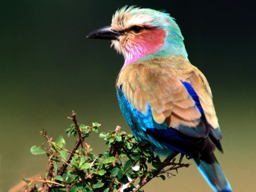

In [30]:
from fastdownload import download_url

dest = 'bird.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *

im = Image.open(dest)
im.to_thumb(256, 256)

Do the same for airplanes

Searching for 'airplane photos'


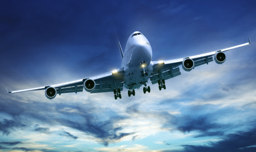

In [31]:
dest = 'airplane.jpg'
download_url(search_images('airplane photos', max_images=1)[0], dest, show_progress=False)
Image.open(dest).to_thumb(256, 256)

Download a couple of the images so that we can use it to train the model

In [32]:
searches = 'airplane', 'bird'
path = Path('bird_or_not')

for o in searches:
    dest = (path / o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    resize_images(dest, max_size=400, dest=dest)

Searching for 'airplane photo'
Searching for 'bird photo'


Next, remove broken images

In [33]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

2

Create the data loader class

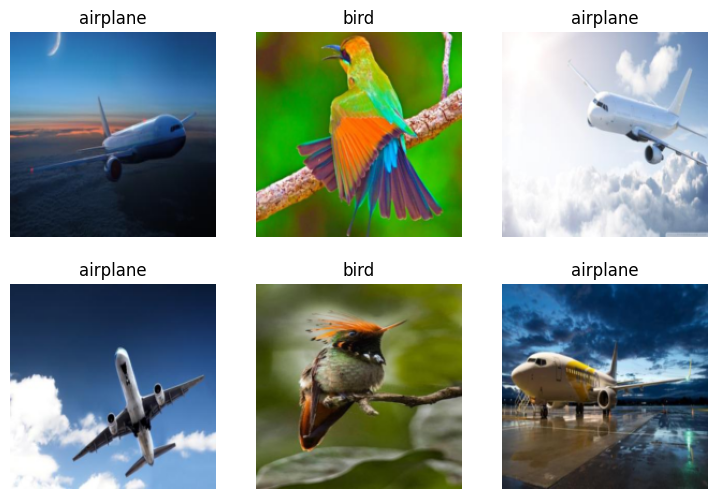

In [34]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

Use the resnet18 model.

In [35]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.204126,2.077856,0.592593,00:06


epoch,train_loss,valid_loss,error_rate,time
0,0.093717,0.219585,0.074074,00:08
1,0.052250,0.002577,0.000000,00:08
2,0.033944,0.000693,0.000000,00:08


In [37]:
is_bird,_,probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: bird.
Probability it's a bird: 0.0015
